# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


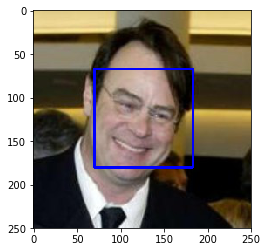

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

- Percentage of the first 100 images in human_files with a detected human face: 98.0%

- Percentage of the first 100 images in dog_files with a detected human face: 17.0%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
count_faces=0
count_dogs=0
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
for i in range(len(human_files_short)):
    count_faces+=face_detector(human_files_short[i])
print("Percentage of the first 100 images in human_files have a detected human face: {}%".format(count_faces/len(human_files_short)*100))

for i in range(len(dog_files_short)):
    count_dogs+=face_detector(dog_files_short[i])
print("Percentage of the first 100 images in dog_files have a detected human face: {}%".format(count_dogs/len(dog_files_short)*100))

Percentage of the first 100 images in human_files have a detected human face: 98.0%
Percentage of the first 100 images in dog_files have a detected human face: 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 111857638.64it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = Image.open(img_path)
    
    in_transform = transforms.Compose([
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
    
    image = in_transform(image)
    
    # add batch dimension
    image = image.unsqueeze_(0)
    
    VGG16.eval()
    output = VGG16(image)
    
    #print(output.shape)
    #predicted = torch.argmax(output)
    index = output.data.numpy().argmax()
    
    return index # predicted class index

In [7]:
# Test the function
VGG16_predict(dog_files[8000])

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    
    if prediction > 150 and prediction < 269:
        output = True
    else:
        output = False
        
    return output # true/false

In [9]:
#test the function

print(dog_detector(dog_files[8000]))
print(dog_detector(human_files[8000]))

True
False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- Percentage of the first 100 images in human_files with a detected dog: 0.0%
- Percentage of the first 100 images in dog_files with a detected dog: 100.0%

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
count_human_dog=0
count_dog_dog=0
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
print(VGG16)
for i in range(len(human_files_short)):
    count_human_dog+=dog_detector(human_files_short[i])
print("Percentage of the first 100 images in human_files have a detected dog: {}%".format(count_human_dog/len(human_files_short)*100))

for i in range(len(dog_files_short)):
    count_dog_dog+=dog_detector(dog_files_short[i])
print("Percentage of the first 100 images in dog_files have a detected dog: {}%".format(count_dog_dog/len(dog_files_short)*100))


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

In [11]:
import torch
import torchvision.models as models

# define VGG16 model
RESNET = models.resnet18(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    RESNET = RESNET.cuda()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 110692725.13it/s]


In [12]:
from PIL import Image
import torchvision.transforms as transforms

def RESNET_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = Image.open(img_path)
    
    in_transform = transforms.Compose([
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
    
    image = in_transform(image)
    
    # add batch dimension
    image = image.unsqueeze_(0)
    
    RESNET.eval()
    output = RESNET(image)
    
    #print(output.shape)
    #predicted = torch.argmax(output)
    index = output.data.numpy().argmax()
    
    return index # predicted class index

In [13]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = RESNET_predict(img_path)
    
    if prediction > 150 and prediction < 269:
        output = True
    else:
        output = False
        
    return output # true/false

In [14]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
count_human_dog=0
count_dog_dog=0
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
print("RESNET")
for i in range(len(human_files_short)):
    count_human_dog+=dog_detector(human_files_short[i])
print("Percentage of the first 100 images in human_files have a detected dog: {}%".format(count_human_dog/len(human_files_short)*100))

for i in range(len(dog_files_short)):
    count_dog_dog+=dog_detector(dog_files_short[i])
print("Percentage of the first 100 images in dog_files have a detected dog: {}%".format(count_dog_dog/len(dog_files_short)*100))


RESNET
Percentage of the first 100 images in human_files have a detected dog: 1.0%
Percentage of the first 100 images in dog_files have a detected dog: 100.0%


__Observations:__
- Performance of ResNet is not better.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

!pip install torchsummary
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

import torch.optim as optim

use_cuda = torch.cuda.is_available()

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Data Exploration

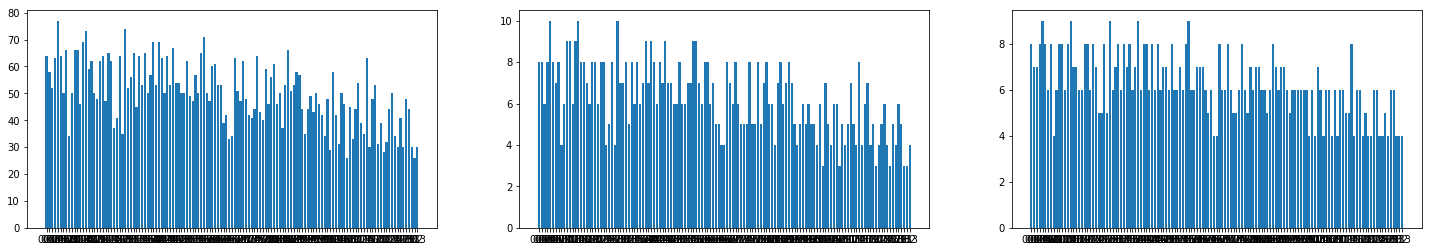

In [2]:
categories_train = np.array(glob("/data/dog_images/train/*/*"))
for i in range(len(categories_train)):
    categories_train[i] = categories_train[i][23:26]
unique_train, counts_train = np.unique(categories_train, return_counts=True)

categories_test = np.array(glob("/data/dog_images/test/*/*"))
for i in range(len(categories_test)):
    categories_test[i] = categories_test[i][22:25]
unique_test, counts_test = np.unique(categories_test, return_counts=True)

categories_valid = np.array(glob("/data/dog_images/valid/*/*"))
for i in range(len(categories_valid)):
    categories_valid[i] = categories_valid[i][23:26]
unique_valid, counts_valid = np.unique(categories_valid, return_counts=True)

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(25,4)) #figsize (width,height) in inches
plt.subplot(1, 3, 1)
plt.bar(unique_train, counts_train)
plt.subplot(1, 3, 2)
plt.bar(unique_test, counts_test)
plt.subplot(1, 3, 3)
plt.bar(unique_valid, counts_valid)
plt.show()

__Oberservations:__
- Almost Normal Distribution for dog categories - maybe not much data augmentation is required

In [3]:
total = len(categories_train) + len(categories_test) + len(categories_valid)
print("Total data: {}".format(total))
print("Length of train_data: {}, {:.1f}%".format(len(categories_train),len(categories_train)/total*100))
print("Length of test_data: {}, {:.1f}%".format(len(categories_test),len(categories_test)/total*100))
print("Length of validate_data: {}, {:.1f}%".format(len(categories_valid),len(categories_valid)/total*100))

Total data: 8351
Length of train_data: 6680, 80.0%
Length of test_data: 836, 10.0%
Length of validate_data: 835, 10.0%


[123, 2316, 5429, 559, 1417, 4732, 6108, 2165, 1822, 1932, 494, 5245, 3216, 1769, 98, 3208, 936, 3769, 769, 1967, 4908, 1929, 3957, 413, 4722, 2991, 704, 4042, 3178, 5102]


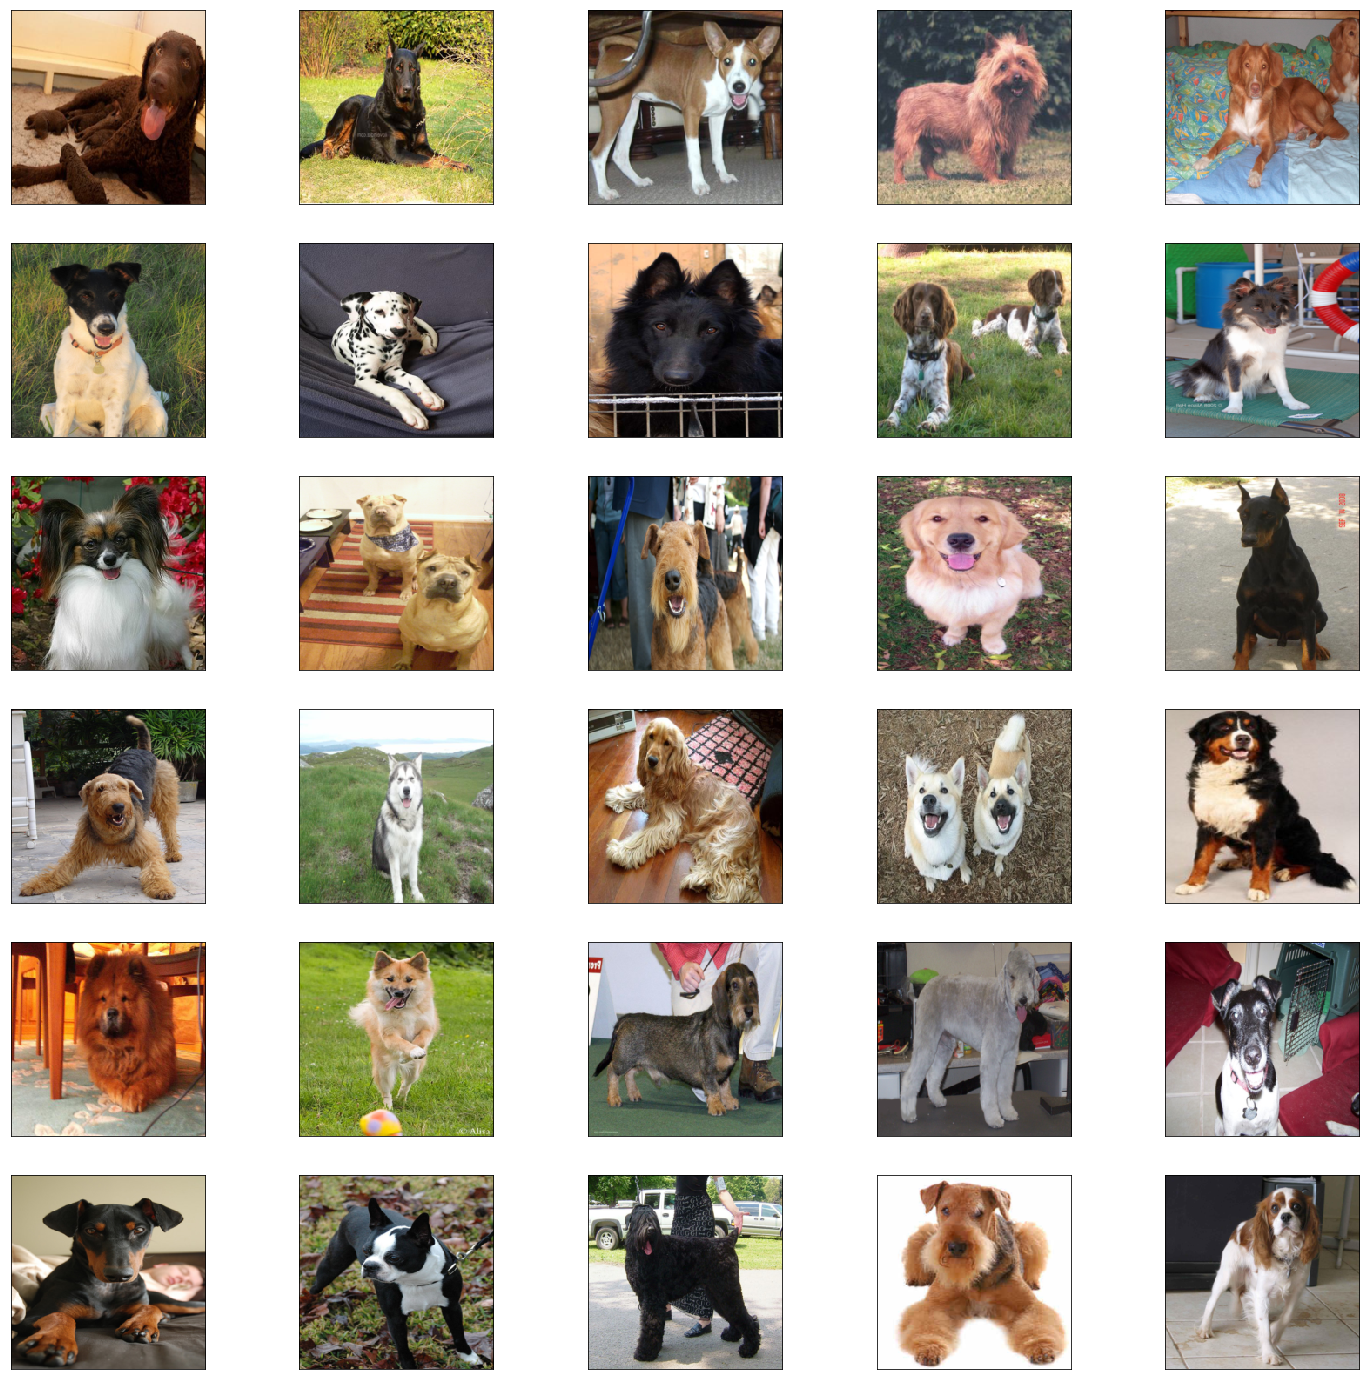

In [8]:
# Take a look at the data

import random
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

transform = transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        #transforms.RandomVerticalFlip(),
                        #transforms.RandomRotation(degrees=15),
                        transforms.Resize((224,224))
                               ])

dog_files = np.array(glob("/data/dog_images/*/*/*"))

index=[]
for i in range(30):
    index.append(random.randint(1,len(dog_files)-1))
print(index)

fig, axes = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True, figsize=(25,25)) #figsize (width,height) in inches

for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(transform(Image.open(dog_files[index[i]])))
    plt.xticks([])
    plt.yticks([])
plt.show()

__Observations:__

- Most dogs fill up the full image -> FiveCrop / TenCrop not ideal
- Heads of some dogs are rotated
- Detection challenges: Multiple dogs in a photo, sometimes there is a human
- Also various background and dogs at different positions in images 

### Data Loading and Transformation

In [2]:
transform = {
    'train' : transforms.Compose([
                        transforms.RandomHorizontalFlip(),  #trasnformations do not increase number of images
                        transforms.RandomRotation(degrees=15),
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    'test' : transforms.Compose([
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    'valid' : transforms.Compose([
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
}

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

files = {
    'train' : datasets.ImageFolder(root='/data/dog_images/train', transform=transform['train']),
    'test' : datasets.ImageFolder(root='/data/dog_images/test', transform=transform['test']),
    'valid' : datasets.ImageFolder(root='/data/dog_images/valid', transform=transform['valid'])
}


loaders_scratch = {
    'train' : torch.utils.data.DataLoader(files['train'], batch_size=batch_size, num_workers=num_workers, shuffle=True),
    'test' : torch.utils.data.DataLoader(files['test'], batch_size=batch_size, num_workers=num_workers, shuffle=True),
    'valid' : torch.utils.data.DataLoader(files['valid'], batch_size=batch_size, num_workers=num_workers, shuffle=True)
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
I resized the images by stretching/compressing them to 224 by 224, as it is an easy size to work with (similar to images used to train VGG). The images are at different positions and thus, I did not use central cropping.

To augment the dataset, I added horizontal flips and rotations to better fit the distribution of the image set as I observed that the heads of some dogs are tilted in some images.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [3]:
# model after VGG
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN 
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)  
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv4a = nn.Conv2d(512, 512, 3, padding=1)
        
        # max pooling layer
        self.pool1 = nn.MaxPool2d(2, 2, ceil_mode=False)
        
        # linear layer
        self.fc1 = nn.Linear(512*7*7, 4096) 
        self.fc2 = nn.Linear(4096, 133) 
        
        # dropout layer
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        
        #224-112-56-28-14-7
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv4a(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        # flatten image input
        x = x.view(-1, 512 * 7 * 7)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.softmax(self.fc2(x))
               
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if torch.cuda.is_available():
    model_scratch = model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4a): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


In [4]:
print(summary(model_scratch, (3, 224, 224))) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
         MaxPool2d-2         [-1, 64, 112, 112]               0
            Conv2d-3        [-1, 128, 112, 112]          73,856
         MaxPool2d-4          [-1, 128, 56, 56]               0
            Conv2d-5          [-1, 256, 56, 56]         295,168
         MaxPool2d-6          [-1, 256, 28, 28]               0
            Conv2d-7          [-1, 512, 28, 28]       1,180,160
         MaxPool2d-8          [-1, 512, 14, 14]               0
            Conv2d-9          [-1, 512, 14, 14]       2,359,808
        MaxPool2d-10            [-1, 512, 7, 7]               0
          Dropout-11                [-1, 25088]               0
           Linear-12                 [-1, 4096]     102,764,544
          Dropout-13                 [-1, 4096]               0
           Linear-14                  [

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [14]:
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)

model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch_vgg.pt')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 	Training Loss: 4.890348 	Validation Loss: 4.890347
Validation loss decreased (inf --> 4.890347).  Saving model ...
Epoch: 2 	Training Loss: 4.890348 	Validation Loss: 4.890345
Validation loss decreased (4.890347 --> 4.890345).  Saving model ...
Epoch: 3 	Training Loss: 4.890345 	Validation Loss: 4.890343
Validation loss decreased (4.890345 --> 4.890343).  Saving model ...
Epoch: 4 	Training Loss: 4.890342 	Validation Loss: 4.890342
Validation loss decreased (4.890343 --> 4.890342).  Saving model ...
Epoch: 5 	Training Loss: 4.890342 	Validation Loss: 4.890340
Validation loss decreased (4.890342 --> 4.890340).  Saving model ...
Epoch: 6 	Training Loss: 4.890337 	Validation Loss: 4.890339
Validation loss decreased (4.890340 --> 4.890339).  Saving model ...
Epoch: 7 	Training Loss: 4.890337 	Validation Loss: 4.890337
Validation loss decreased (4.890339 --> 4.890337).  Saving model ...
Epoch: 8 	Training Loss: 4.890335 	Validation Loss: 4.890336
Validation loss decreased (4.89033

In [15]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test Loss: 4.890330


Test Accuracy:  1% (10/836)


__Observations__:
- Model training is very slow (each epoch takes a long time, per epoch improvement is marginal

__Potential improvements and trade-offs:__:
- Use deeper layers BUT training will be even longer
- Try newer techniques - batch normalisation, global max pooling

__Further Observations after tweaking model:__ 

- Not much improvement from 256 to 512 layers
- Lower dropout for linear layers if batch norm is used (0.15 or 0.2), otherwise 0.25 or 0.2 makes a difference
- Second convolution with the same number of layers matter but made training slower
- Learning rate affects speed of training


In [2]:
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN 
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)

        #batch normalization - after conv later OR after ReLu
        self.conv_bn1 = nn.BatchNorm2d(16)
        self.conv_bn2 = nn.BatchNorm2d(32)
        self.conv_bn3 = nn.BatchNorm2d(64)
        self.conv_bn4 = nn.BatchNorm2d(128)
        self.conv_bn5 = nn.BatchNorm2d(256)
        
        # max pooling layer
        self.pool1 = nn.MaxPool2d(2, 2, ceil_mode=False)
        self.pool_global = nn.AvgPool2d(14) #global max pooling reduces model size
        
        # linear layer
        #self.fc1 = nn.Linear(256*14*14, 4096) 
        #self.fc2 = nn.Linear(4096, 133) 
        self.fc = nn.Linear(256, 133) 
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
    
    def forward(self, x):
        
        #224-112-56-28-14-7
        x = self.conv1(x)
        x = self.conv_bn1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.conv_bn2(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv3(x)
        x = self.conv_bn3(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv4(x)
        x = self.conv_bn4(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv5(x)
        x = self.conv_bn5(x) # might not need in the last layer. ref batch norm lesson
        x = F.relu(x)
        
        x = self.pool_global(x) #256x7x7
        
        # flatten image input
        x = x.view(-1, 256 * 1 * 1)
      
        #x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        #x = F.softmax(self.fc(x))
        x = self.fc(x)
               
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
#print(summary(model_scratch, (3, 224, 224))) #Does not work with cuda
print(model_scratch)

# move tensors to GPU if CUDA is available
if torch.cuda.is_available():
    model_scratch = model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool_global): AvgPool2d(kernel_size=14, stride=

In [3]:
print(summary(model_scratch, (3, 224, 224))) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
         MaxPool2d-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           4,640
       BatchNorm2d-5         [-1, 32, 112, 112]              64
         MaxPool2d-6           [-1, 32, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]          18,496
       BatchNorm2d-8           [-1, 64, 56, 56]             128
         MaxPool2d-9           [-1, 64, 28, 28]               0
           Conv2d-10          [-1, 128, 28, 28]          73,856
      BatchNorm2d-11          [-1, 128, 28, 28]             256
        MaxPool2d-12          [-1, 128, 14, 14]               0
           Conv2d-13          [-1, 256, 14, 14]         295,168
      BatchNorm2d-14          [-1, 256,

In [11]:
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)

model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch_vgg.pt')

Epoch: 1 	Training Loss: 4.782505 	Validation Loss: 4.781924
Validation loss decreased (inf --> 4.781924).  Saving model ...
Epoch: 2 	Training Loss: 4.587512 	Validation Loss: 4.642306
Validation loss decreased (4.781924 --> 4.642306).  Saving model ...
Epoch: 3 	Training Loss: 4.407248 	Validation Loss: 4.466236
Validation loss decreased (4.642306 --> 4.466236).  Saving model ...
Epoch: 4 	Training Loss: 4.235603 	Validation Loss: 4.401460
Validation loss decreased (4.466236 --> 4.401460).  Saving model ...
Epoch: 5 	Training Loss: 4.089569 	Validation Loss: 4.114427
Validation loss decreased (4.401460 --> 4.114427).  Saving model ...
Epoch: 6 	Training Loss: 3.948020 	Validation Loss: 4.503888
Epoch: 7 	Training Loss: 3.827939 	Validation Loss: 3.965130
Validation loss decreased (4.114427 --> 3.965130).  Saving model ...
Epoch: 8 	Training Loss: 3.712854 	Validation Loss: 4.123640
Epoch: 9 	Training Loss: 3.626597 	Validation Loss: 3.857326
Validation loss decreased (3.965130 --> 3.

In [12]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.973795


Test Accuracy: 12% (101/836)


__Potential model improvements:__
- Use adaptive learning rates / Reduce learning rate(seems like there are some oscillations from epochs 8 onwards
- Train for more epochs

__After note:__

Softmax is already implemented in nn.CrossEntropyLoss(). Hence, there is no need to add that as the last layer.
https://pytorch.org/docs/master/nn.html#torch.nn.CrossEntropyLoss

Results after removing it:

In [18]:
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN 
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)  
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv4a = nn.Conv2d(512, 512, 3, padding=1)
        
        # max pooling layer
        self.pool1 = nn.MaxPool2d(2, 2, ceil_mode=False)
        
        # linear layer
        self.fc1 = nn.Linear(512*7*7, 4096) 
        self.fc2 = nn.Linear(4096, 133) 
        
        # dropout layer
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        
        #224-112-56-28-14-7
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv4a(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        # flatten image input
        x = x.view(-1, 512 * 7 * 7)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
               
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
#print(summary(model_scratch, (3, 224, 224))) #Does not work with cuda
print(model_scratch)

# move tensors to GPU if CUDA is available
if torch.cuda.is_available():
    model_scratch = model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4a): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


In [19]:
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)

model_scratch = train(5, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch_vgg.pt')

Epoch: 1 	Training Loss: 4.882427 	Validation Loss: 4.866098
Validation loss decreased (inf --> 4.866098).  Saving model ...
Epoch: 2 	Training Loss: 4.815455 	Validation Loss: 4.703058
Validation loss decreased (4.866098 --> 4.703058).  Saving model ...
Epoch: 3 	Training Loss: 4.659051 	Validation Loss: 4.544287
Validation loss decreased (4.703058 --> 4.544287).  Saving model ...
Epoch: 4 	Training Loss: 4.510653 	Validation Loss: 4.426442
Validation loss decreased (4.544287 --> 4.426442).  Saving model ...
Epoch: 5 	Training Loss: 4.327307 	Validation Loss: 4.286161
Validation loss decreased (4.426442 --> 4.286161).  Saving model ...


In [20]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.241679


Test Accuracy:  6% (55/836)


In [22]:
#continue to train the model as it seems to be still improving 
model_scratch = train(5, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch_vgg.pt')

Epoch: 1 	Training Loss: 3.953547 	Validation Loss: 4.094659
Validation loss decreased (inf --> 4.094659).  Saving model ...
Epoch: 2 	Training Loss: 3.788194 	Validation Loss: 4.044597
Validation loss decreased (4.094659 --> 4.044597).  Saving model ...
Epoch: 3 	Training Loss: 3.576258 	Validation Loss: 3.852500
Validation loss decreased (4.044597 --> 3.852500).  Saving model ...
Epoch: 4 	Training Loss: 3.324951 	Validation Loss: 3.862210
Epoch: 5 	Training Loss: 3.074958 	Validation Loss: 3.794127
Validation loss decreased (3.852500 --> 3.794127).  Saving model ...


In [23]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.672204


Test Accuracy: 16% (135/836)


__Observations:__
- Modification of a VGG model performs better. There is no need to add batchnorm. (BUT training still slower without the global max pool layer)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

- I started with a simplied version of VGG, with 5 convolution layers (3-64-128-256-512-512) followed by ReLu activation and MaxPool. There were 2 last linear layers with a dropout of 0.25 in between. The training was slow and I got an accuracy of about 1%.
Changing various parameters like dropout and increasing the number of convolution layers did not have significant improvement. 
- After reading some papers, I added batch normalisation in between the Convolution and ReLu functions, and decreased the dropout to 0.15. There was negligible improvement.
Changing the order of the functions to Conv - ReLu-Pool - BatchNorm did not improve the model either. I also experimented with several optimizers to no avail.
- Then, I replaced the 2 linear layers by a Global Max Pool to reduce the model size and for the model to train more quickly. Even at a learning rate of 0.2, the training loss improvement per epoch is only about 0.00005.
- Finally, I removed the last softmax function, hoping that this will increase the training rate. The training loss improved more quickly. Overfitting was observed around epoch 7 as training loss decreased while validation loss did not. The best model was obtained after 8 epochs with an accuracy of 10%.

       Test Loss: 4.547163        Test Accuracy: 10% (88/836)
   

- I then added a dropout before the last linear layer. 0.2 was too high but 0.1 proved to improve the model slightly.

        Test Loss: 3.973795        Test Accuracy: 12% (101/836)

- Wondering why removing the softmax worked, I did some googling and realised that softmax is already implemented within nn.CrossEntropy(). I decided to check back on the first model, by just removing the softmax layer. The result turned out to be the best by-far, but signs of over-fitting around the 8th epoch remains.

        Test Loss: 3.672204        Test Accuracy: 16% (135/836)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [31]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)
#exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_scratch, step_size=7, gamma=0.1)
#optimizer_scratch = optim.RMSprop(model_scratch.parameters(), lr=0.2)
#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.5)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [3]:
import torch
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
      
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
             
                    
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        #for name, param in model.fc.named_parameters(): 
        #    print(name, param.data)    
                
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_cifar.pt')
            valid_loss_min = valid_loss

    # return trained model
    return model

In [ ]:
# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch_jh.pt')

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch_jh.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [4]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
#test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

In [ ]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [5]:
transform = {
    'train' : transforms.Compose([
                        transforms.RandomHorizontalFlip(),  #does not increase number of images, just flips them
                        transforms.RandomRotation(degrees=15),
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    'test' : transforms.Compose([
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    'valid' : transforms.Compose([
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
}

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

files = {
    'train' : datasets.ImageFolder(root='/data/dog_images/train', transform=transform['train']),
    'test' : datasets.ImageFolder(root='/data/dog_images/test', transform=transform['test']),
    'valid' : datasets.ImageFolder(root='/data/dog_images/valid', transform=transform['valid'])
}

loaders_transfer = {
    'train' : torch.utils.data.DataLoader(files['train'], batch_size=batch_size, num_workers=num_workers),
    'test' : torch.utils.data.DataLoader(files['test'], batch_size=batch_size, num_workers=num_workers),
    'valid' : torch.utils.data.DataLoader(files['valid'], batch_size=batch_size, num_workers=num_workers)
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [12]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

## TODO: Specify model architecture 

model_transfer = models.resnet18(pretrained=True)
print(model_transfer)

# Freeze training for all "features" layers
for param in model_transfer.parameters():
    param.requires_grad = False

#Unfreeze last conv layer -> get better results?
#for param in model_transfer.layer4[1].conv2.parameters():
#    param.requires_grad = True
    
n_inputs = model_transfer.fc.in_features

last_layer = nn.Linear(n_inputs, 133, bias = True)

model_transfer.fc = last_layer

if torch.cuda.is_available():
    model_transfer = model_transfer.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [13]:
model_transfer.fc

Linear(in_features=512, out_features=133, bias=True)

In [14]:
print(summary(model_transfer, (3, 224, 224)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Number of dog images are small (as compared to ImageNet which was used to train VGG), and are also dissimilar to the original training data. Hence, more layers at the end needs to be replaced, although just stripping the last layer was sufficient to get 80% accuracy to the flower classification transfer learning exercise.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [15]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(filter(lambda p: p.requires_grad,model_transfer.parameters()), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model
import numpy as np
n_epochs = 10

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 8.818595 	Validation Loss: 5.739745
Validation loss decreased (inf --> 5.739745).  Saving model ...
Epoch: 2 	Training Loss: 7.528431 	Validation Loss: 7.082764
Epoch: 3 	Training Loss: 7.566106 	Validation Loss: 6.694774
Epoch: 4 	Training Loss: 7.529278 	Validation Loss: 6.519275
Epoch: 5 	Training Loss: 7.489252 	Validation Loss: 6.394591
Epoch: 6 	Training Loss: 7.452108 	Validation Loss: 6.241271
Epoch: 7 	Training Loss: 7.420009 	Validation Loss: 6.126494
Epoch: 8 	Training Loss: 7.392484 	Validation Loss: 5.986011
Epoch: 9 	Training Loss: 7.360799 	Validation Loss: 5.916609


__Results:__
- LR = 0.1
        Epoch: 1 	Training Loss: 12.559216 	Validation Loss: 46.979374
- LR = 0.01
        Epoch: 1 	Training Loss: ~5 	Validation Loss: ~<5
        Validation loss increase
- LR = 0.005
        Epoch: 1 	Training Loss: 4.687735 	Validation Loss: 5.289638
        Validation loss decreased (inf --> 5.289638).  Saving model ...
        Epoch: 2 	Training Loss: 4.770319 	Validation Loss: 5.207141
        Validation loss decreased (5.289638 --> 5.207141).  Saving model ...
        Epoch: 3 	Training Loss: 4.753299 	Validation Loss: 5.078537
        Validation loss decreased (5.207141 --> 5.078537).  Saving model ...
        Epoch: 4 	Training Loss: 4.726197 	Validation Loss: 4.965718
        Validation loss decreased (5.078537 --> 4.965718).  Saving model ...
        Epoch: 5 	Training Loss: 4.701176 	Validation Loss: 4.846803
        Validation loss decreased (4.965718 --> 4.846803).  Saving model ...
        Epoch: 6 	Training Loss: 4.678950 	Validation Loss: 4.750106
        Validation loss decreased (4.846803 --> 4.750106).  Saving model ...
- LR = 0.001
        Epoch: 1 	Training Loss: 5.086270 	Validation Loss: 4.975640
        Validation loss decreased (inf --> 4.975640).  Saving model ...
        Epoch: 2 	Training Loss: 5.046070 	Validation Loss: 4.939723
        Validation loss decreased (4.975640 --> 4.939723).  Saving model ...
        Epoch: 3 	Training Loss: 5.037471 	Validation Loss: 4.910023
        Validation loss decreased (4.939723 --> 4.910023).  Saving model ...
        
Replace SGD with Adam

        Epoch: 1 	Training Loss: 8.818595 	Validation Loss: 5.739745
        Validation loss decreased (inf --> 5.739745).  Saving model ...
        Epoch: 2 	Training Loss: 7.528431 	Validation Loss: 7.082764
        Epoch: 3 	Training Loss: 7.566106 	Validation Loss: 6.694774
        Epoch: 4 	Training Loss: 7.529278 	Validation Loss: 6.519275
        Epoch: 5 	Training Loss: 7.489252 	Validation Loss: 6.394591
        Epoch: 6 	Training Loss: 7.452108 	Validation Loss: 6.241271
        Epoch: 7 	Training Loss: 7.420009 	Validation Loss: 6.126494
        Epoch: 8 	Training Loss: 7.392484 	Validation Loss: 5.986011
        Epoch: 9 	Training Loss: 7.360799 	Validation Loss: 5.916609

- Re-train last convolution layer too
        Epoch: 1 	Training Loss: 5.123680 	Validation Loss: 5.019831


Repeat with ResNet50
- LR = 0.001, re-train last FC layer
        Epoch: 1 	Training Loss: 4.994135 	Validation Loss: 4.904807
        Validation loss decreased (inf --> 4.904807).  Saving model ...
        Epoch: 2 	Training Loss: 4.989738 	Validation Loss: 4.884143
        Validation loss decreased (4.904807 --> 4.884143).  Saving model ...

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [36]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in files['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path)
    
    in_transform = transforms.Compose([
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), 
                                             (0.5, 0.5, 0.5))])
    
    image = in_transform(image)
    
    # add batch dimension
    image = image.unsqueeze_(0)
    
    model_transfer.eval()
    output = model_transfer(image)
    index = output.data.numpy().argmax()
    
    return class_names[index] # predicted class index

In [38]:
print(dog_files[800])
predict_breed_transfer(dog_files[800])

/data/dog_images/train/028.Bluetick_coonhound/Bluetick_coonhound_01957.jpg


'Bernese mountain dog'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [40]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    dog = dog_detector(img_path)
    human = face_detector(img_path)
    if dog:
        print("Dog detected, predicted breed is: "+ predict_breed_transfer(img_path))
    elif human:
        print("Human detected, resembling dog breed is: "+ predict_breed_transfer(img_path))
    else:
        print("Error, neither human nor dog is detected.")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)